In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
sur=df.pop("Survived")


In [4]:
df.insert(11,"Survived",sur)

In [5]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
df.shape

(891, 12)

In [7]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [9]:
df.columns.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [10]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [11]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

There are 177 null values in Age column out of 891 rows,687 null values in Cabin column out of 891 and 2 null values in Embarked Column.

In [12]:
df.nunique().to_frame()

,0
PassengerId,891
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


HANDLING NULL VALUES

In [14]:
#AGE
#since age has numerical datatype, we can fill the null values with the mean of all the columns
np.mean(df["Age"])

29.69911764705882

In [15]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [16]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [17]:
#Now we will handle Embarked column. Since it has object datatype, we will fill the null value with mode.
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

Since Cabin has total values of 891, null values of 687 and unique value of 147, it is not practical to fill all the null values with mode hence we will be dropping Cabin column

In [18]:
df=df.drop("Cabin",axis=1)

In [19]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [20]:
# for i in df.columns:
 #   print(df[i].value_counts())
  #  print("\n")

In [21]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

<Axes: >

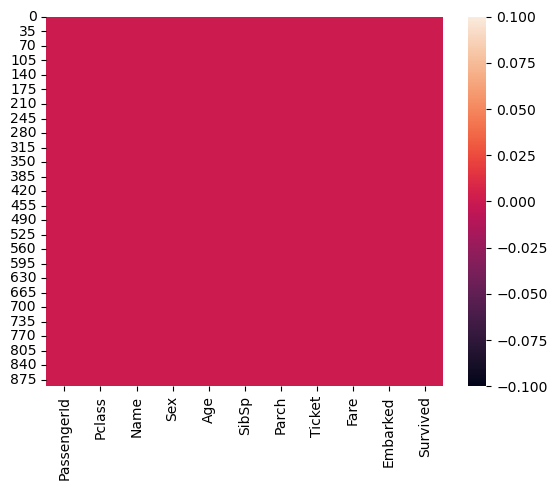

In [22]:
sns.heatmap(df.isnull())

Here we can see that now there are no null values in the dataset

In [23]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Above data shows that the total count in each column is 891 which means there are no null values. In Pclass median is more than mean, in PassengerID and Age mean and median are same which indicates normal distribution. In SibSp, Parch Fare and Survived, mean is greater than median which indecates slightly positively skewed data.In Fare column there is a big difference between 75th percentile and max which indicates presence of outliers.

In [24]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

As per above data out of 891 passengers only 342 survived

In [25]:
#checking correlation
dfcor=df.corr()
dfcor

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


<Axes: >

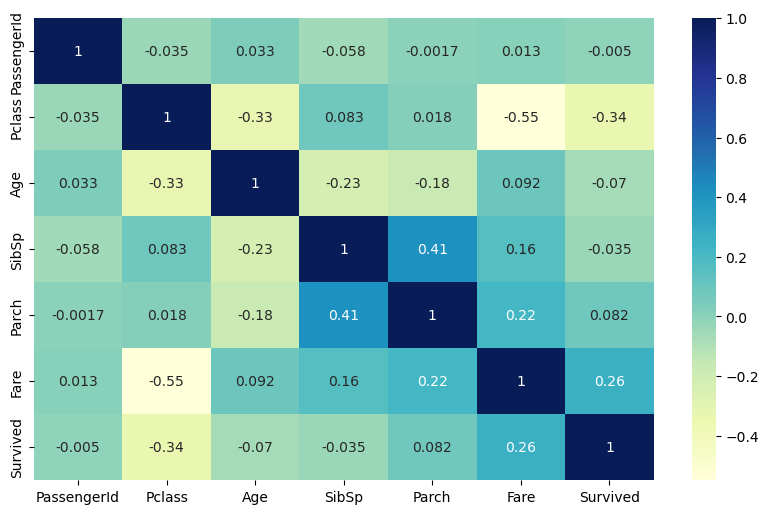

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True,cmap="YlGnBu")

Above heatmap shows the correlation between various columns in dataset. 
1.) Survived is most positively correlated to fare(0.26)
2.) Sibsp is positively correlated to Parch(0.41)
3.)Pclass is negatively correlated to fare(-.55)
4.) Pclass is most negatively correlated with Survived(-0.34)
From above data we can say survival rate is not very dependant on any column much except Fare and Pclass

0    549
1    342
Name: Survived, dtype: int64


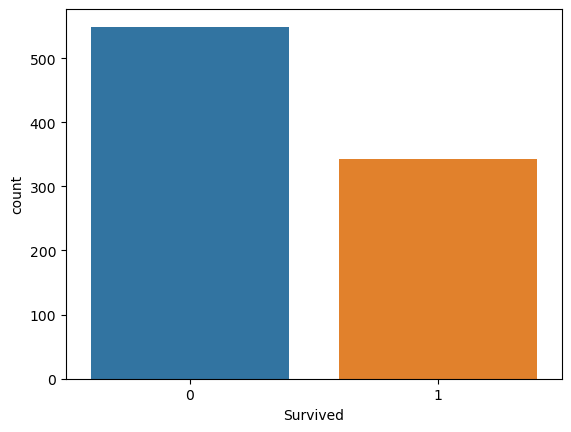

In [27]:
#Data Visualization
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())              

Above graph shows that out of 891, only 342 survived

male      577
female    314
Name: Sex, dtype: int64


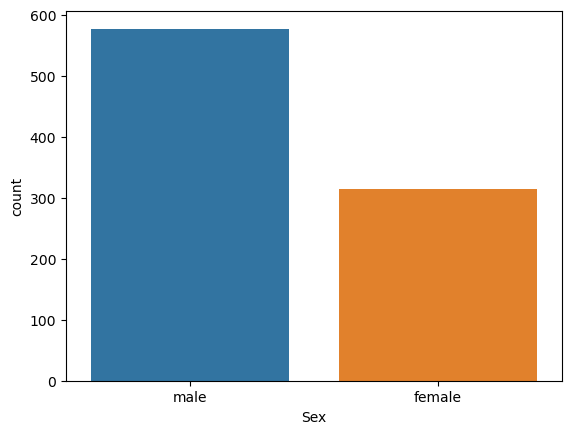

In [28]:
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts()) 

Out of 891 , 577 were male and 314 were female

S    646
C    168
Q     77
Name: Embarked, dtype: int64


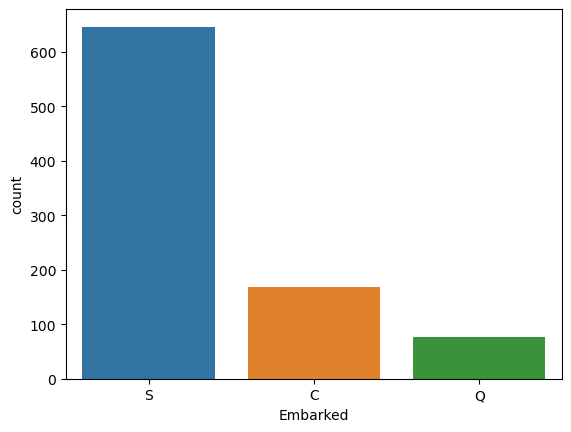

In [29]:
sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts()) 

Above graph shows that 646 people embarked from SOuthampton,168 from Cherbourg and 77 from Queenstown

3    491
1    216
2    184
Name: Pclass, dtype: int64


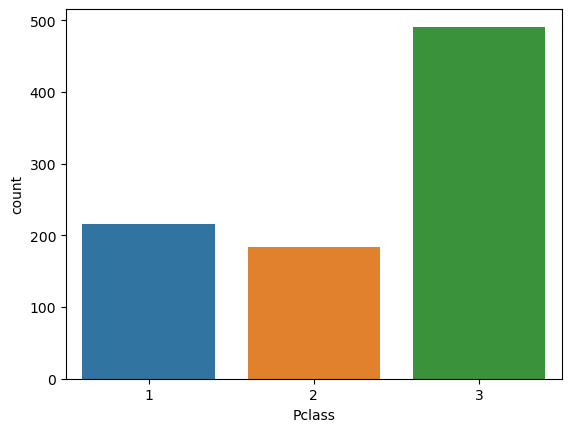

In [30]:
sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts()) 

Above graph shos that out of 891,491 were in 3rd class,216 were in 2nd class and 184 were in first class

In [31]:
obj=[]
numerical=[]
for i in df:
    if df[i].dtype=="object":
        obj.append(i)
    else:
        numerical.append(i)
        
numerical

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

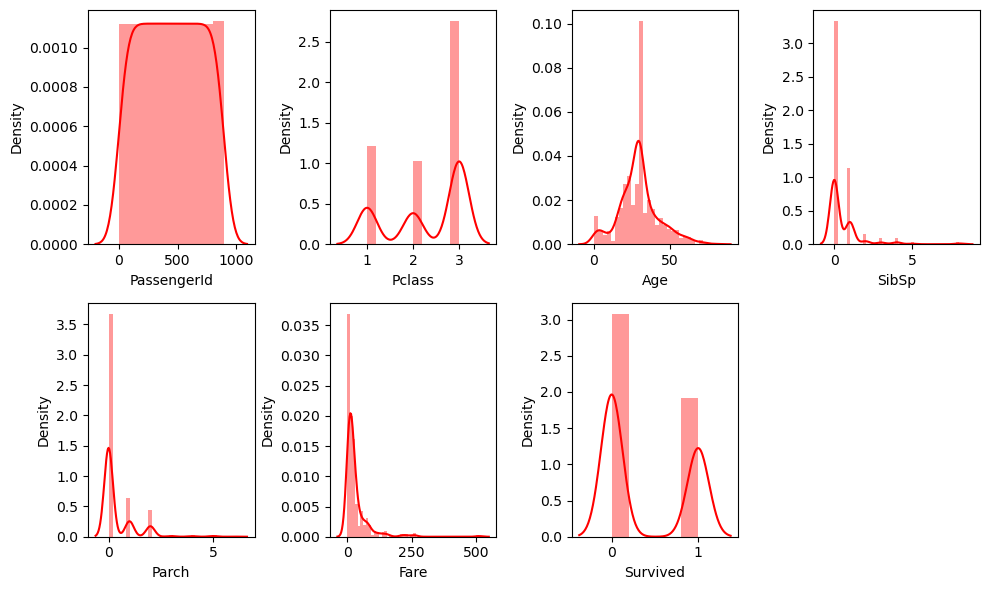

In [32]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col],color='r')
    plotnumber+=1
plt.tight_layout()  

Above distribution graphs show that positive skewness is present in Parch, Fare and SibSp where as rest are almost normal distribution

PassengerId       Axes(0.125,0.53;0.168478x0.35)
Pclass         Axes(0.327174,0.53;0.168478x0.35)
Age            Axes(0.529348,0.53;0.168478x0.35)
SibSp          Axes(0.731522,0.53;0.168478x0.35)
Parch             Axes(0.125,0.11;0.168478x0.35)
Fare           Axes(0.327174,0.11;0.168478x0.35)
Survived       Axes(0.529348,0.11;0.168478x0.35)
dtype: object

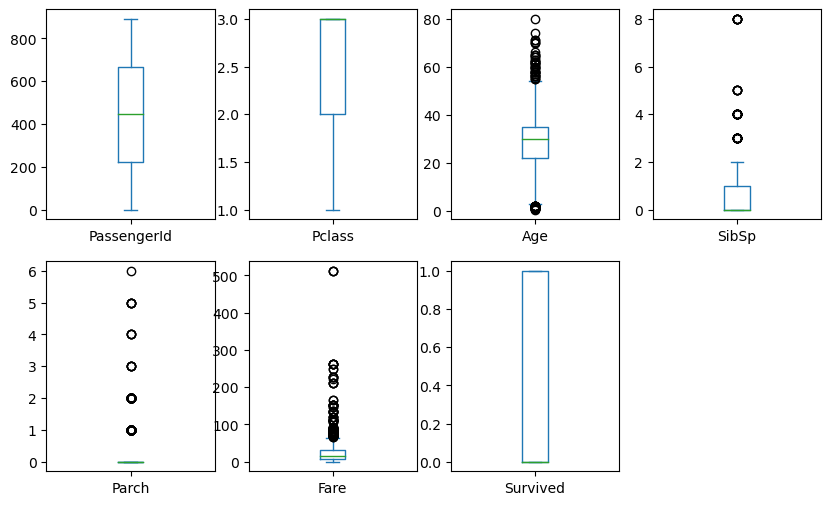

In [33]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,6))

As we can see that there are certain outliers present in Fare, Age, Parch and SibSp

<Axes: xlabel='Sex', ylabel='Survived'>

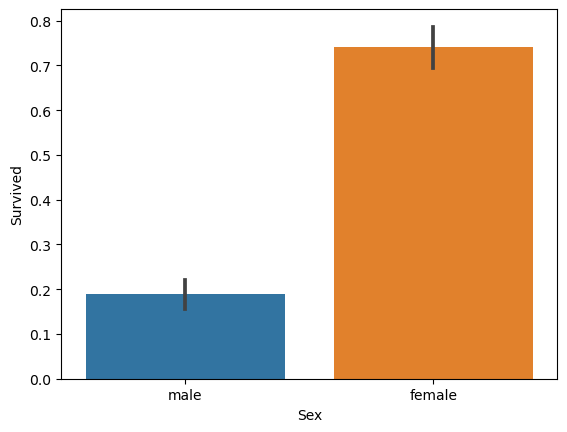

In [34]:
sns.barplot(x="Sex",y='Survived',data=df)

Above barplot indicates that the number of female survivors was hif=gher than Male survivors

<Axes: xlabel='Pclass', ylabel='Survived'>

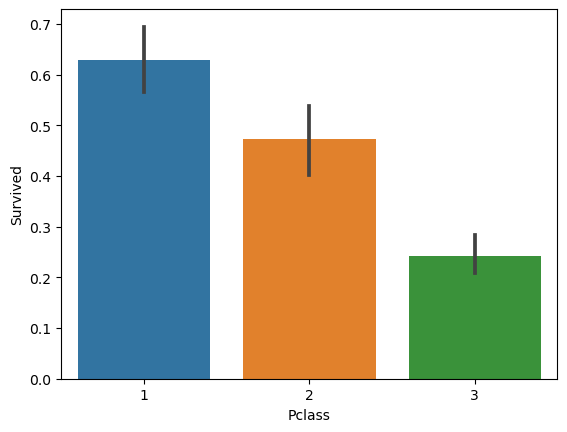

In [35]:
sns.barplot(data=df,x="Pclass",y="Survived")

Here we can see that the survival rate of 1st class is highest while 3rd class is lowest

<Axes: xlabel='SibSp', ylabel='Survived'>

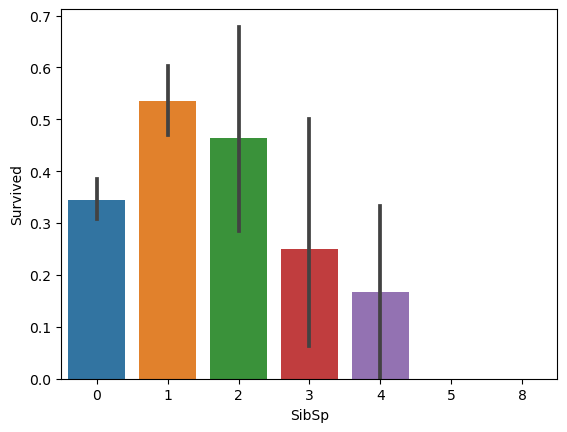

In [36]:
sns.barplot(data=df,x="SibSp",y="Survived")

Here we can see that as number of siblings abroad increase survival rate decreases

<Axes: xlabel='Parch', ylabel='Survived'>

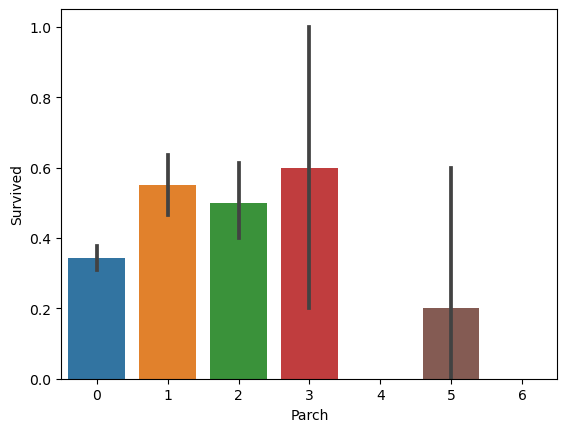

In [37]:
sns.barplot(data=df,x="Parch",y="Survived")

Here the data is not showing any specific pattern

<Axes: xlabel='Survived', ylabel='Fare'>

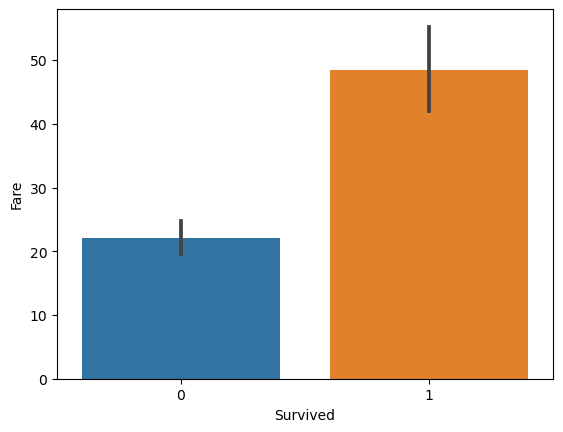

In [38]:
sns.barplot(data=df,y="Fare",x="Survived")

Here we can see that those who paid higher fare had more chances of survival.

<Axes: xlabel='Embarked', ylabel='Survived'>

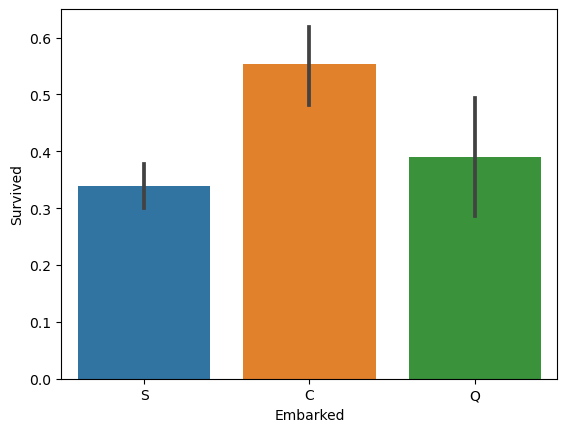

In [39]:
sns.barplot(data=df,x="Embarked",y="Survived")

As we can see above that most survival rate was of people who embarked at Cherbourg and least was at Southampton

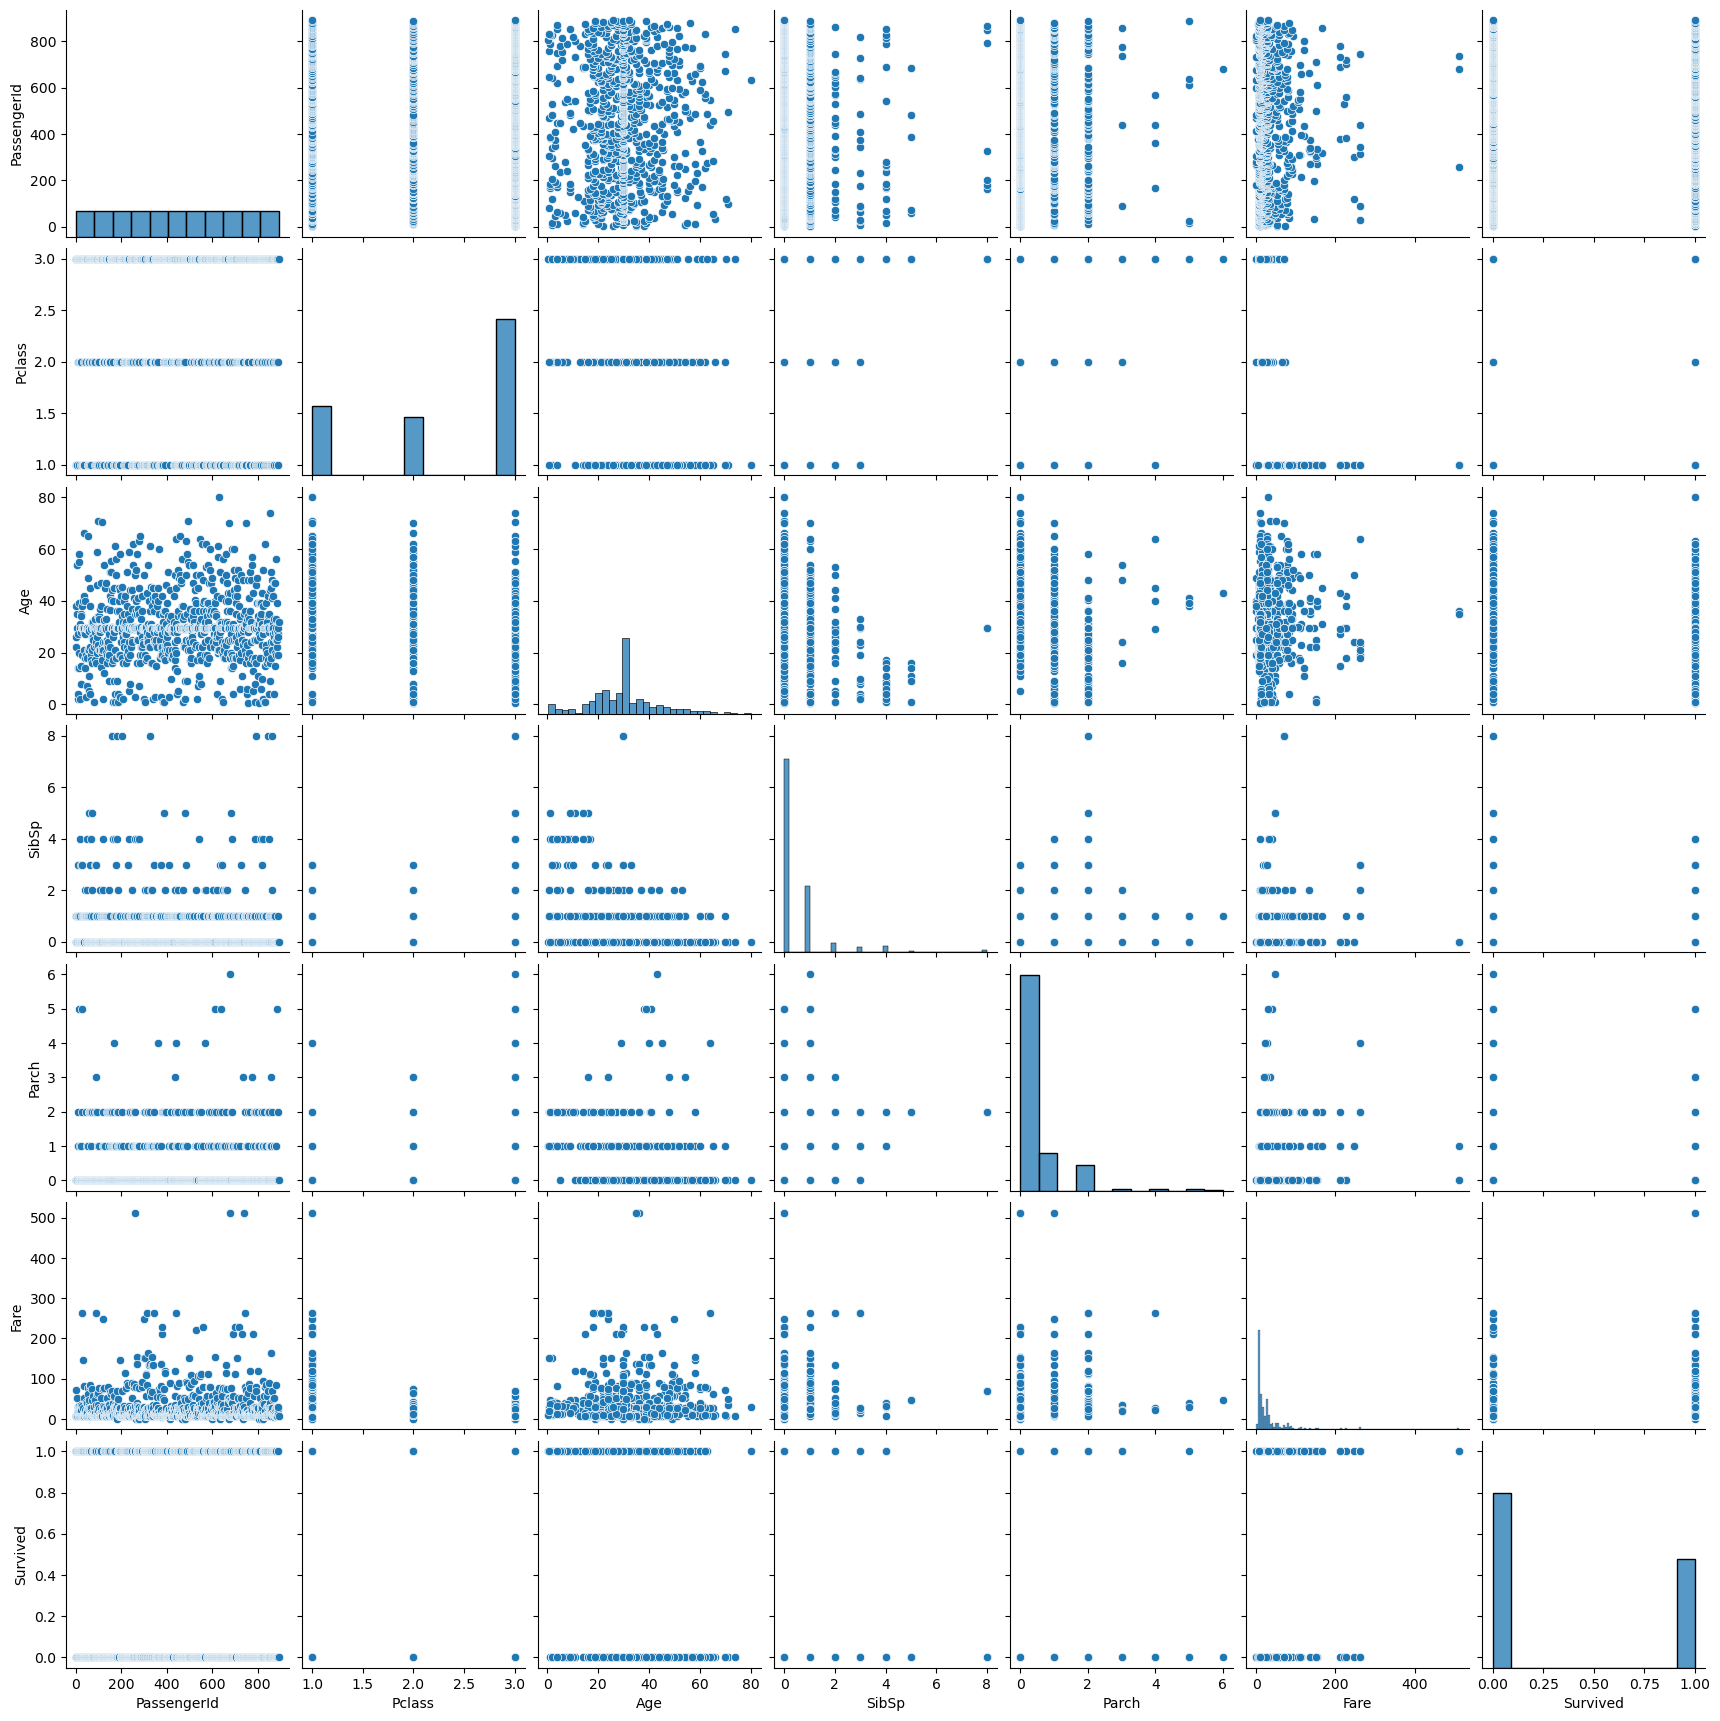

In [40]:
sns.pairplot(df)

As we can see from above pair plot
1.) Majority of people were in the age range of 20-40
2.) Parch that is class 3 people had more relatives
3.) As SblSp increases, age decreases

<Axes: xlabel='Pclass', ylabel='Survived'>

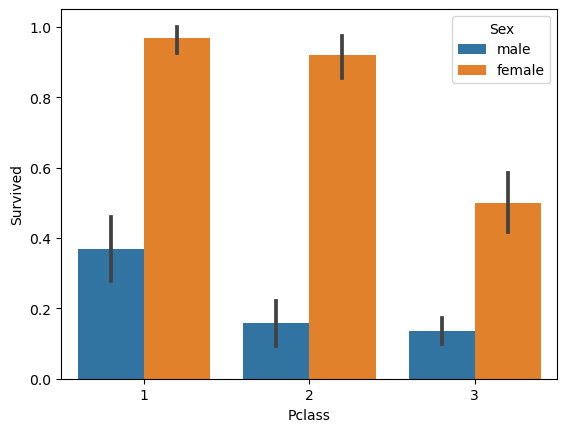

In [41]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=df)

Here we can see that in every class the rate of survival of females is pretty much higher than males

As we can see that PassengerID has all unique values and do not contribute anything to the data analysis, we will drop it.

In [42]:
df=df.drop(["PassengerId"],axis=1)

Now we know that all the names are unique but they have certain titles which are repetitive hence we will extract these titles from name column and create a new feature and drop the name column.

In [43]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [44]:
#extracting titles using regex
df['Titles']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

df['Titles']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Titles, Length: 891, dtype: object

In [45]:
df['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [46]:
df['Titles'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Titles, dtype: int64

Since several titles occur once or twice in the dataset, we will club them under others

In [47]:
df['Titles']=df['Titles'].replace(['Dr','Rev','Mlle','Major','Col','Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'],'Others')

In [48]:
df['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [49]:
df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Survived      int64
Titles       object
dtype: object

Now we will drop the Name column

In [50]:
df=df.drop(['Name'],axis=1)

In [51]:
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Titles
0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,Mr
1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,Mrs
2,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,1,female,35.000000,1,0,113803,53.1000,S,1,Mrs
4,3,male,35.000000,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,211536,13.0000,S,0,Others
887,1,female,19.000000,0,0,112053,30.0000,S,1,Miss
888,3,female,29.699118,1,2,W./C. 6607,23.4500,S,0,Miss
889,1,male,26.000000,0,0,111369,30.0000,C,1,Mr


Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Titles, dtype: int64

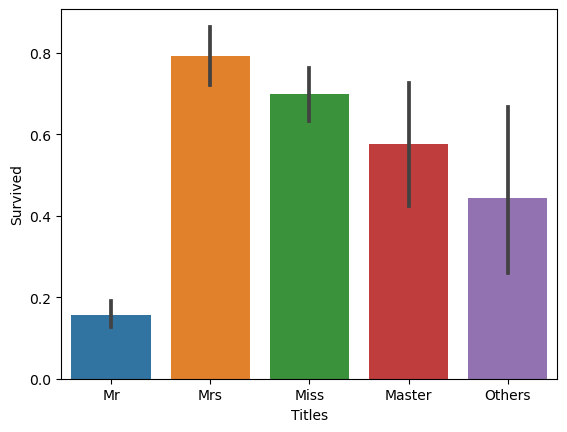

In [52]:
sns.barplot(x="Titles",y="Survived",data=df)
df['Titles'].value_counts()

As we can see the least number of survivors were adullt males

In [53]:
#Now we will remove outliers
z=np.abs(zscore(df[['Age','SibSp','Parch','Fare']]))
z

,Age,SibSp,Parch,Fare
0,0.592481,0.432793,0.473674,0.502445
1,0.638789,0.432793,0.473674,0.786845
2,0.284663,0.474545,0.473674,0.488854
3,0.407926,0.432793,0.473674,0.420730
4,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.207709,0.474545,0.473674,0.386671
887,0.823344,0.474545,0.473674,0.044381
888,0.000000,0.432793,2.008933,0.176263
889,0.284663,0.474545,0.473674,0.044381


In [54]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [55]:
df1=df[(z<3).all(axis=1)]
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Titles
0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,Mr
1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,Mrs
2,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,1,female,35.000000,1,0,113803,53.1000,S,1,Mrs
4,3,male,35.000000,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,211536,13.0000,S,0,Others
887,1,female,19.000000,0,0,112053,30.0000,S,1,Miss
888,3,female,29.699118,1,2,W./C. 6607,23.4500,S,0,Miss
889,1,male,26.000000,0,0,111369,30.0000,C,1,Mr


In [56]:
print("Data_loss%= ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data_loss%=  7.968574635241302


The data loss is less than 10 % which is good

In [57]:
#Now we will Encode the categorical data
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))

df1
    

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Titles
0,3,1.0,22.000000,1,0,511.0,7.2500,2.0,0,2.0
1,1,0.0,38.000000,1,0,579.0,71.2833,0.0,1,3.0
2,3,0.0,26.000000,0,0,647.0,7.9250,2.0,1,1.0
3,1,0.0,35.000000,1,0,48.0,53.1000,2.0,1,3.0
4,3,1.0,35.000000,0,0,461.0,8.0500,2.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,99.0,13.0000,2.0,0,4.0
887,1,0.0,19.000000,0,0,14.0,30.0000,2.0,1,1.0
888,3,0.0,29.699118,1,2,653.0,23.4500,2.0,0,1.0
889,1,1.0,26.000000,0,0,8.0,30.0000,0.0,1,2.0


We have coverted the entire dataset into numerical values.

In [58]:
df1.dtypes

Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Ticket      float64
Fare        float64
Embarked    float64
Survived      int64
Titles      float64
dtype: object

In [59]:
#We will not remove the skewness as it is giving Nan Values

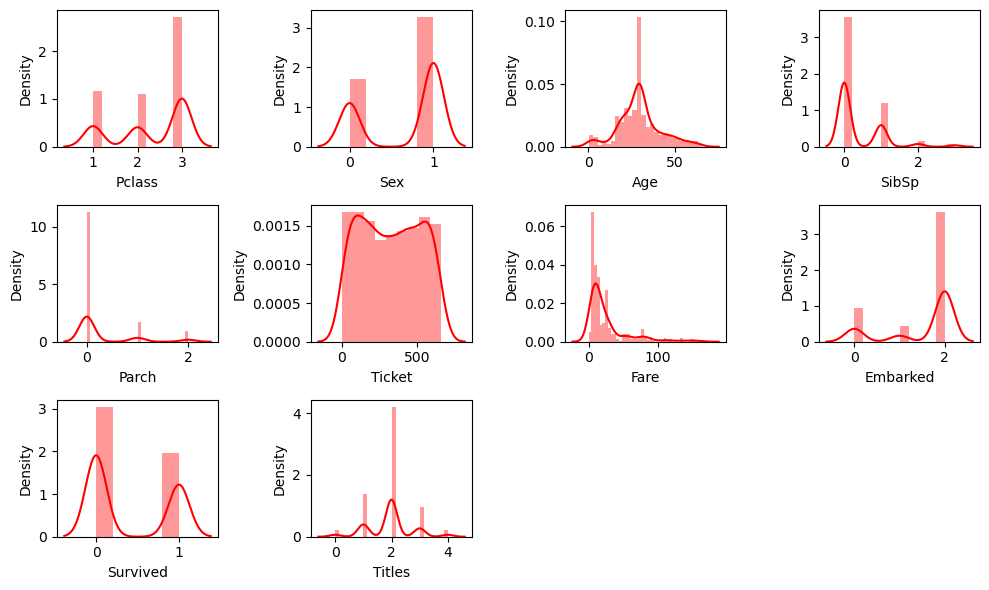

In [60]:
#Distribution plot after removing skewness
#To check skewness in df after transformation
plt.figure(figsize=(10,6))
plotnumber=1
for col in df1:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[col],color='r')
    plotnumber+=1
plt.tight_layout()    

In [61]:
df1cor=df1.corr()
df1cor

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Titles
Pclass,1.000000,0.138041,-0.327522,-0.052312,-0.078366,0.354875,-0.691720,0.122145,-0.322306,-0.194794
Sex,0.138041,1.000000,0.094544,-0.199204,-0.251872,0.064049,-0.244614,0.116708,-0.554888,0.067867
Age,-0.327522,0.094544,1.000000,-0.148196,-0.259724,-0.092805,0.152344,-0.008781,-0.090926,0.433710
SibSp,-0.052312,-0.199204,-0.148196,1.000000,0.307210,-0.005609,0.247216,-0.013767,0.094459,-0.038322
Parch,-0.078366,-0.251872,-0.259724,0.307210,1.000000,-0.025799,0.259903,-0.016184,0.201071,-0.191393
Ticket,0.354875,0.064049,-0.092805,-0.005609,-0.025799,1.000000,-0.152895,0.030385,-0.160183,-0.072737
Fare,-0.691720,-0.244614,0.152344,0.247216,0.259903,-0.152895,1.000000,-0.192566,0.330439,0.061045
Embarked,0.122145,0.116708,-0.008781,-0.013767,-0.016184,0.030385,-0.192566,1.000000,-0.154994,-0.005886
Survived,-0.322306,-0.554888,-0.090926,0.094459,0.201071,-0.160183,0.330439,-0.154994,1.000000,-0.077570
Titles,-0.194794,0.067867,0.433710,-0.038322,-0.191393,-0.072737,0.061045,-0.005886,-0.077570,1.000000


<Axes: >

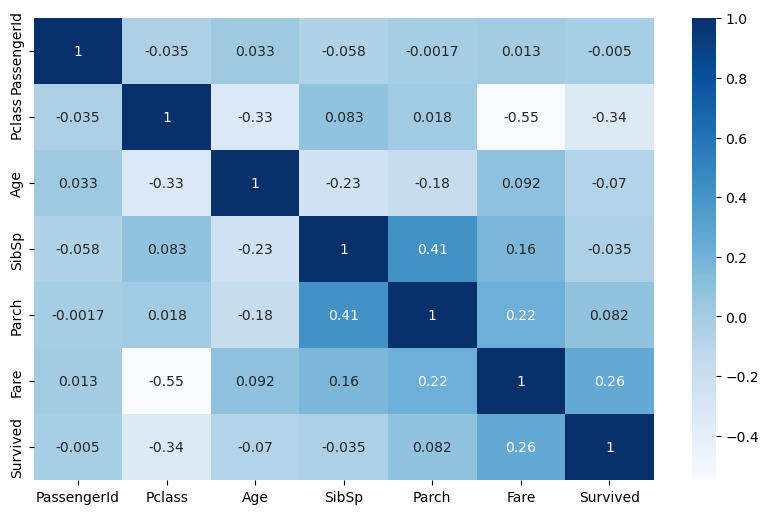

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [63]:
df1cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.330439
Parch       0.201071
SibSp       0.094459
Titles     -0.077570
Age        -0.090926
Embarked   -0.154994
Ticket     -0.160183
Pclass     -0.322306
Sex        -0.554888
Name: Survived, dtype: float64

In [64]:
#Now separating dependent and independent variables
x=df1.drop('Survived',axis=1)
y=df1['Survived']

In [65]:
print(x.shape)
print(y.shape)

(820, 9)
(820,)


In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [67]:
#finding best random state in df1
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best Accuracy is",maxAccu,"at random state", maxRS)

Best Accuracy is 0.8821138211382114 at random state 154


Creating train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

RANDOM FOREST CLASSIFIER

In [99]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
predRFC
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8821138211382114
[[139  14]
 [ 15  78]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       153
           1       0.85      0.84      0.84        93

    accuracy                           0.88       246
   macro avg       0.88      0.87      0.87       246
weighted avg       0.88      0.88      0.88       246



OBS: The accuracy score using Random Forest Classifier is 88.21%

LOGISTIC REGRESSION

In [102]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
predLR
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7845528455284553
[[128  25]
 [ 28  65]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       153
           1       0.72      0.70      0.71        93

    accuracy                           0.78       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.78      0.78      0.78       246



OBS: The accuracy score using Logistic Regression is 78.45%

GAUSSIAN NAIVE BAYES

In [103]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
predgnb
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7926829268292683
[[121  32]
 [ 19  74]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       153
           1       0.70      0.80      0.74        93

    accuracy                           0.79       246
   macro avg       0.78      0.79      0.78       246
weighted avg       0.80      0.79      0.79       246



The accuracy score with GAUSSIAN NAIVE BAYES is 79.26%

KNN CLASSIFIER

In [72]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
predKNN
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.6869918699186992
[[124  29]
 [ 48  45]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       153
           1       0.61      0.48      0.54        93

    accuracy                           0.69       246
   macro avg       0.66      0.65      0.65       246
weighted avg       0.68      0.69      0.68       246



The accuracy score with KNeighborsClassifier is 68.69%

SUPPORT VECTOR MACHINE CLASSIFIER

In [73]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7073170731707317
[[142  11]
 [ 61  32]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       153
           1       0.74      0.34      0.47        93

    accuracy                           0.71       246
   macro avg       0.72      0.64      0.63       246
weighted avg       0.72      0.71      0.67       246



The accuracy score with SVC is 70.73%

DECISION TREE CLASSIFIER

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7926829268292683
[[125  28]
 [ 23  70]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       153
           1       0.71      0.75      0.73        93

    accuracy                           0.79       246
   macro avg       0.78      0.78      0.78       246
weighted avg       0.80      0.79      0.79       246



The accuracy score with DTC is 79.26%

ADABOOST CLASSIFIER

In [75]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8455284552845529
[[134  19]
 [ 19  74]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       153
           1       0.80      0.80      0.80        93

    accuracy                           0.85       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.85      0.85      0.85       246



The accuracy score with AdaBoost Classifier is 84.55%

GRADIENT BOOSTING CLASSIFIER

In [76]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8699186991869918
[[137  16]
 [ 16  77]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       153
           1       0.83      0.83      0.83        93

    accuracy                           0.87       246
   macro avg       0.86      0.86      0.86       246
weighted avg       0.87      0.87      0.87       246



The accuracy score with Gradient Boosting Classifier is 86.99%

BAGGING CLASSIFIER

In [77]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
predBC
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8373983739837398
[[133  20]
 [ 20  73]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       153
           1       0.78      0.78      0.78        93

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246



The accuracy score with Bagging Classifier is 83.73%

EXTRA TREES CLASSIFIER

In [78]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
predET
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8292682926829268
[[128  25]
 [ 17  76]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       153
           1       0.75      0.82      0.78        93

    accuracy                           0.83       246
   macro avg       0.82      0.83      0.82       246
weighted avg       0.83      0.83      0.83       246



The accuracy score with Extra Trees Classifier is 82.92%

Observation: Random Forest Classifier has the highest Accuracy score among all classification models

CROSS VALIDATION SCORE

In [104]:
#CVS for df1
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is: ",accuracy_score(y_test,predRFC)-score.mean())

CV Score :  [0.81097561 0.81097561 0.84146341 0.80487805 0.84756098]
0.8231707317073171
0.017672410666084645
Difference between Accuracy Score and Cross Validation Score is:  0.05894308943089421


In [105]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predLR)-score.mean())

CV Score :  [0.79268293 0.79878049 0.76829268 0.78658537 0.81707317]
0.7926829268292683
0.01590049367122595
Difference between Accuracy Score and Cross Validation Score is :  -0.008130081300813052


In [106]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score=cross_val_score(gnb,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgnb)-score.mean())

CV Score :  [0.75609756 0.7804878  0.79268293 0.79878049 0.80487805]
0.7865853658536585
0.017246506858208492
Difference between Accuracy Score and Cross Validation Score is :  0.0060975609756098725


In [107]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predKNN)-score.mean())

CV Score :  [0.61585366 0.67682927 0.68292683 0.71341463 0.68902439]
0.6756097560975609
0.032357315027857554
Difference between Accuracy Score and Cross Validation Score is :  0.011382113821138296


In [108]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predsvc)-score.mean())

CV Score :  [0.60365854 0.62804878 0.68292683 0.7195122  0.71341463]
0.6695121951219511
0.046180722509174356
Difference between Accuracy Score and Cross Validation Score is :  0.03780487804878052


In [109]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,preddtc)-score.mean())

CV Score :  [0.72560976 0.73780488 0.81097561 0.7804878  0.76219512]
0.7634146341463415
0.030463404870236115
Difference between Accuracy Score and Cross Validation Score is :  0.029268292682926855


In [110]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predad)-score.mean())

CV Score :  [0.81707317 0.81707317 0.84146341 0.83536585 0.87195122]
0.8365853658536585
0.020186518728349836
Difference between Accuracy Score and Cross Validation Score is :  0.008943089430894391


In [111]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(gb,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgb)-score.mean())

CV Score :  [0.79878049 0.82926829 0.87195122 0.80487805 0.86585366]
0.8341463414634147
0.030218321203326487
Difference between Accuracy Score and Cross Validation Score is :  0.03577235772357712


In [112]:
#Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predBC)-score.mean())

CV Score :  [0.79268293 0.76829268 0.87195122 0.79878049 0.85365854]
0.8170731707317074
0.03913855252653952
Difference between Accuracy Score and Cross Validation Score is :  0.020325203252032464


In [113]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x,y)
print("CV Score : ",(score))
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predET)-score.mean())

CV Score :  [0.78658537 0.81097561 0.82317073 0.77439024 0.83536585]
0.8060975609756097
0.02261858169633096
Difference between Accuracy Score and Cross Validation Score is :  0.023170731707317094


Obs: As we can see the difference between Accuracy Score and Cross validation score is least(0.0089) in AdaBoost classifier and it has the highest accuracy of 83.65% after CVS.
    Hence we can conclude that AdaBoost Classifier is our best model

HYPERPARAMETER TUNING

In [114]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[10,50,100],'random_state':[10,16,42,50,100,154],'learning_rate':[1,2,3]}

In [116]:
GCV=GridSearchCV(ad,parameters,cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [10, 50, 100],
                         'random_state': [10, 16, 42, 50, 100, 154]})

In [118]:
GCV.best_params_

{'learning_rate': 3, 'n_estimators': 100, 'random_state': 10}

In [131]:
Final_model=AdaBoostClassifier(learning_rate=3,n_estimators=100,random_state=10)
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
acc=accuracy_score(y_test,finalpred)
print(acc*100)

78.86178861788618


In [139]:
Final_model=AdaBoostClassifier(learning_rate=1,n_estimators=100,random_state=10)
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
acc=accuracy_score(y_test,finalpred)
print(acc*100)

84.5528455284553


Here we can see that above though in GCV it is giving learning rate as 3 but we are getting more accuracy at learning rate=1. Hence we will be taking learning rate as 1 for our final model

PLOTTING ROC AND COMPARING AUC

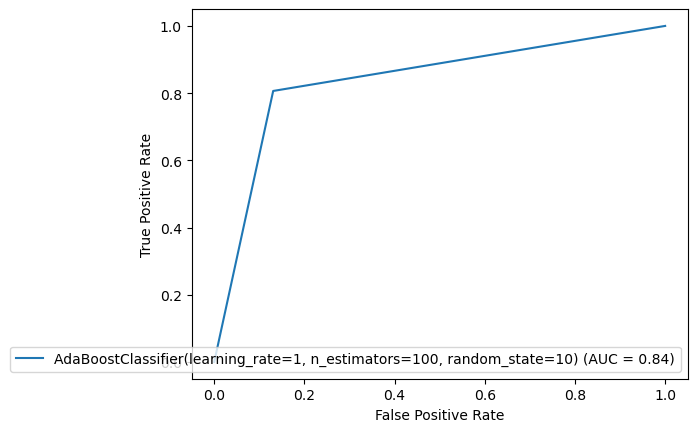

In [140]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,finalpred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()



Here we have plotted the ROC curvefor the final model and the AUC value for the best model is 84%

SAVING THE MODEL

In [141]:
import joblib
joblib.dump(Final_model,'Titanic Survived Project.pkl')

['Titanic Survived Project.pkl']

PREDICTING THE SAVED MODEL

In [142]:
#Lets load the saved model and get predictions
model=joblib.load("Titanic Survived Project.pkl")

#prediction
prediction=model.predict(x_test)

In [143]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
241,1,1
242,0,1
243,1,0
244,0,0


In [144]:
#FINISH